<a href="https://colab.research.google.com/github/KeertanPatro/Unsupervised/blob/main/Netflix_Movies_and_TV_shows_clustering_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Netflix Movies and TV Shows Clustering**



##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
##### **Team Member 1 -** Konapala Sai Keertan Patro


# **Project Summary -**

The goal of this project is to analyze the Netflix catalog of movies and TV shows, which was sourced from the third-party search engine Flixable, and group them into relevant clusters. This will aid in enhancing the user experience and prevent subscriber churn for the world's largest online streaming service provider, Netflix, which currently boasts over 220 million subscribers as of 2022-Q2. The dataset, which includes movies and TV shows as of 2019, will be analyzed to uncover new insights and trends in the rapidly growing world of streaming entertainment.   

In our project we first did bit of data wrangling to understand our dataset there are approximatly **7787 records and 11 attributes** in our dataset. We then did **Exploratory Data Analysis** to understand the nature of each of the attributes in our dataset, After that we handled our **missing values** and **outliers** in the dataset, and then we did text preprocessing.   

 In **text preprocessing** we have **combined the attributes cast, country, genre, director, rating, and description**  to create different clusters. **The TFIDF vectorizer** was used to tokenize, preprocess, and vectorize the values in these attributes. After TFIDF we have to reduce dimension as there were lot of features, problem of dimensionality was dealt with through the use of **Principal Component Analysis (PCA)**. USing PCA we have reduced 10,000 features to 3000 features which explains more than **80% of our variance**.   

We have used **Kmeans** and **Agglomerative clustering** techniques to form relevent clusters we have used techniques like the **elbow method**, **silhouette score** to determine optimal number of clusters in Kmeans, while we have used **dendrogram** to determine optimal number of clusters in agglomerative clustering, we have got **6 clusters for Kmeans** and **9 clusters for agglomerative clustering.**   

After doing clustering analysis, we have developed a **Content based recommender system** which will recommend top 10 similar movies or show based to the user's current movie choice. We have used **cosine similarity** to compute similarity score between two items.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

# data wrangling
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from wordcloud import WordCloud, STOPWORDS

# text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA



# Model implementation for clustering and recommendation systems

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
plt.style.use('ggplot')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Netflix_clustering_unsupervised/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df[df.duplicated()]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

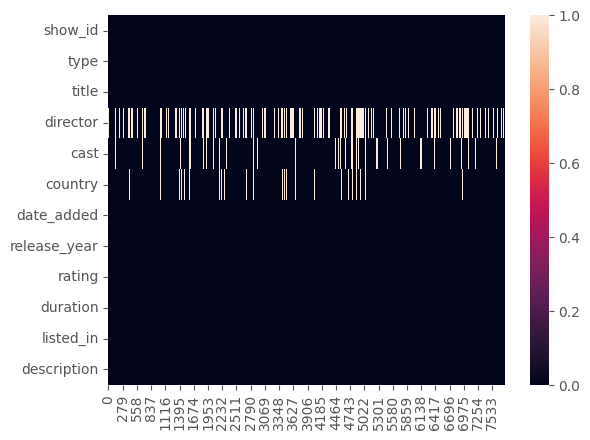

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isna().transpose())

### What did you know about your dataset?

*  There are 7787 observations and 12 columns.  
* There are some missing values found in column director,cast and country.  
* There are no duplicate values present in thid dataset.  
* The datatype of the most features are object.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='object')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   

              country       date_added rating  duration      listed_in  \
count            7280             7777   7780      7787           7787   
unique            681             1565     14       216            492   
top     United States  January 1, 2020  TV-MA  1 Season  Documentaries   
freq             2555              118   2863      1608            334   

                                              description  
count                                                7787  
unique                                               7769  
top     Multiple women report their husbands as missin...  
freq                                                    3

### Variables Description

**Show_id:** unique id foe each movie.  
**type:**    identifier(movie/TV show).   
**Title:**   Title of the movie/show.   
**director:**  Director of the show.   
**cast:**  actors involved.      
**country:**  Country of the  production.  
**date_added:** date it was added on netflix.   
**Year_release:**  Actual release year of the show.  
**ratings:**  TV ratings of the show.  
**duration:** Total duration in minutes or number of seasons.  
**listed_in:** Genre of the Movie/Show.   
**Description:** A brief description of the movie/show.  

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# converting date_added column to date datatype
df['date_added']=pd.to_datetime(df['date_added'])


In [ ]:
# adding month and year feature to our data
df['month_added']=df['date_added'].dt.month_name()
df['year_added']=df['date_added'].dt.year.convert_dtypes()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7780 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
 12  month_added   7777 non-null   object        
 13  year_added    7777 non-null   Int64         
dtypes: Int64(1), datetime64[ns](1), int64(1), object(11)
memory usage: 859.4+ KB


In [ ]:
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description month_added  year_added  
0  In a future where the elite inhabit an island ...      August        2020  
1  After a devastating earthquake hits Mexico Cit...    December        2016  
2  When an army recruit is found dead, his fellow...    December        2018  
3  In a postapocalyptic world, rag-doll robots hi...    November        2017  
4  A brilliant group of students become card-coun...     January        2020

### What all manipulations have you done and insights you found?

I have changed date_added column into datetime format and extracted month and year from the feature.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Exploring motion picture categories.

In [ ]:
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

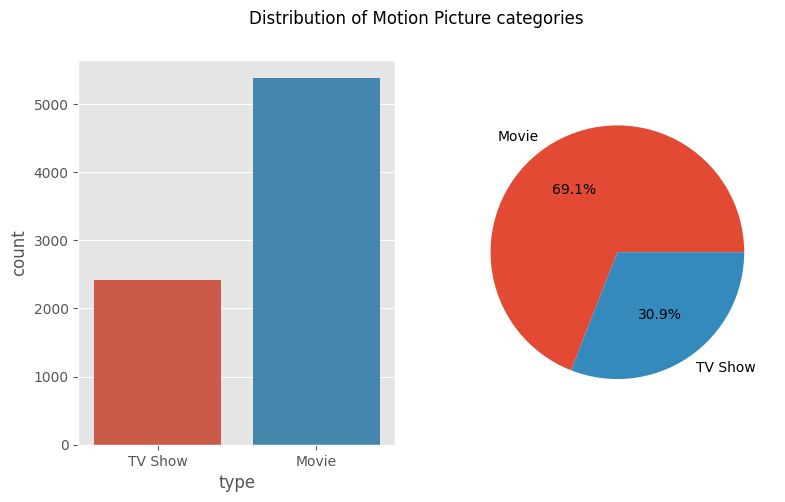

In [ ]:
# different types of items
fig,ax=plt.subplots(1,2,figsize=(9,5))
sns.countplot(x='type',data=df,ax=ax[0])
ax[1].pie(df['type'].value_counts(),labels=['Movie','TV Show'],autopct='%.1f%%')
fig.suptitle('Distribution of Motion Picture categories')
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to see the distribution of movies and TV shows in the dataset.

##### 2. What is/are the insight(s) found from the chart?

We see that more movies than TV shows in our dataset, around 69% of the items are movies while 31% items are TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Top Directors

In [ ]:
tv_directors=df[df['type']=='TV Show']['director'].str.split(', ').explode().value_counts(ascending=False)
movie_directors=df[df['type']=='Movie']['director'].str.split(', ').explode().value_counts(ascending=False)

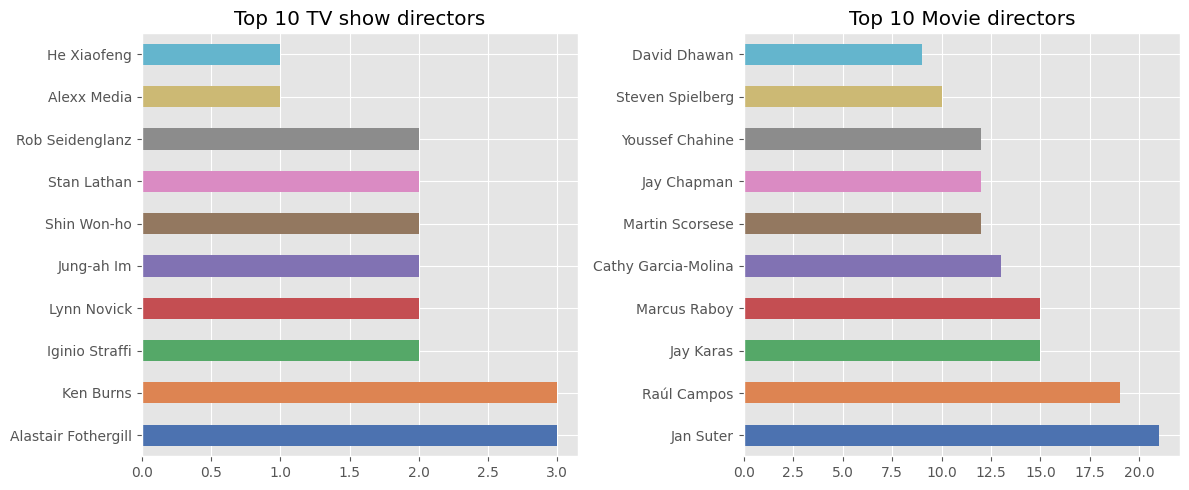

In [ ]:
# visualizing top 10 directors
color=sns.color_palette('deep')
fig,ax=plt.subplots(1,2,figsize=(12,5))
tv_directors[:10].plot(kind='barh',ax=ax[0],color=color)
ax[0].set_title("Top 10 TV show directors")
movie_directors[:10].plot(kind='barh',ax=ax[1],color=color)
plt.tight_layout()
ax[1].set_title("Top 10 Movie directors")
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to look into top 10 directors of both movies and TV show

##### 2. What is/are the insight(s) found from the chart?

*  The top TV show directors in netflix are Alastair Fothergill, Ken Burns having directed 3 and 2 netflix TV shows .  

*  The top directors in the netflix who have directed movies are Jan Suter, Raul Campos having directed 21 and 19 movies respectively.  

#### Top Casts

In [ ]:
# Chart - 3 visualization code
df['cast']

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                                  NaN
Name: cast, Length: 7787, dtype: object

In [ ]:
# separating tv cast names
tv_cast_names=df[df['type']=='TV Show']['cast'].str.split(', ').explode().value_counts()

# separating movie cast names
movie_cast_names=df[df['type']=='Movie']['cast'].str.split(', ').explode().value_counts()


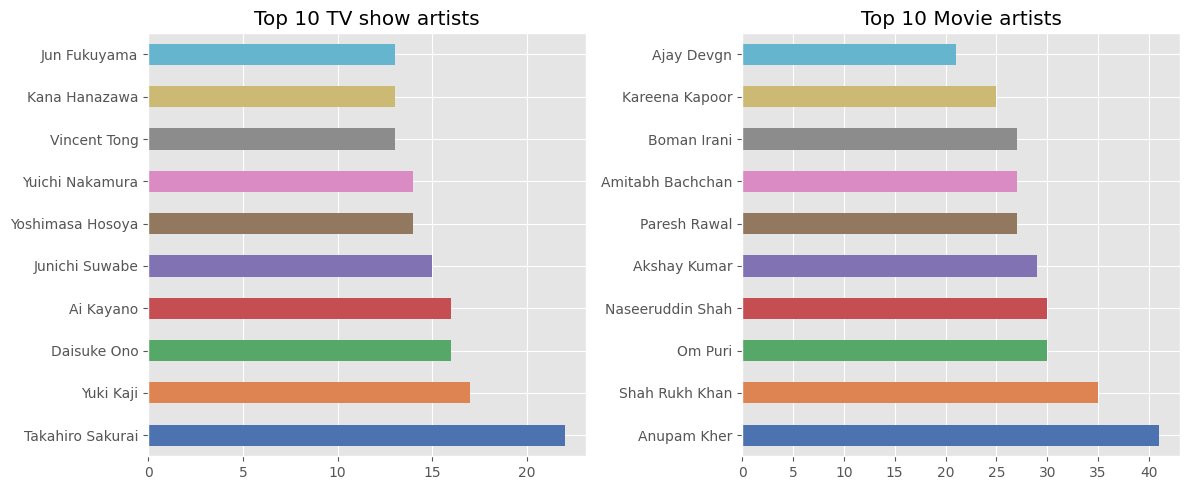

In [ ]:
# Visualizing top casts
color=sns.color_palette('deep')
fig,ax=plt.subplots(1,2,figsize=(12,5))
tv_cast_names[:10].plot(kind='barh',ax=ax[0],color=color)
ax[0].set_title("Top 10 TV show artists")
movie_cast_names[:10].plot(kind='barh',ax=ax[1],color=color)
plt.tight_layout()
ax[1].set_title("Top 10 Movie artists")
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to look into top artists in both tv as well as movies featuring in Netflix.

##### 2. What is/are the insight(s) found from the chart?

* The top artists featuring in Netflix TV shows are **Takahiro Sakurai** and **Yuki Kaji** featuring 23 and 17 shows respectively.  

* The top artists featuring in Netflix movies are **Anupam Kher** and Shah Rukh Khan featuring 40 and 35 movies respectively.  

#### Distribution of Pictures based on country

In [ ]:
country_counts=df['country'].str.split(", ").explode()
country_counts=country_counts.value_counts()
country_counts.rename(index={'United States':'United States of America'},inplace=True)

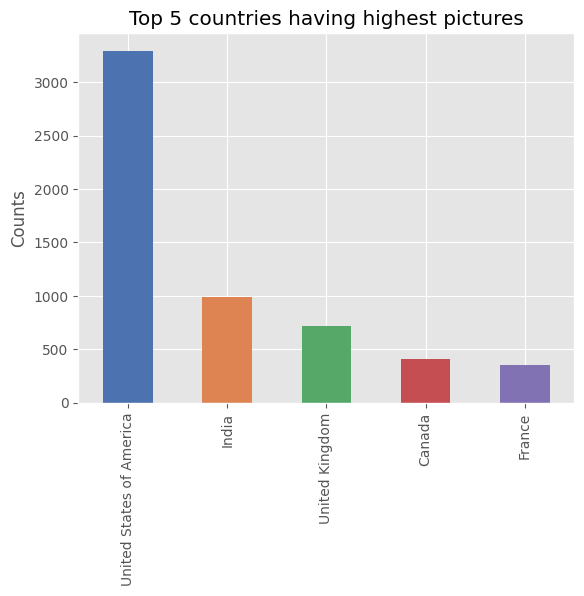

In [ ]:
# top 5 countries
country_counts[:5].plot(kind='bar',color=color)
plt.title("Top 5 countries having highest pictures")
plt.ylabel('Counts')
plt.show()

<ipython-input-28-0dda1c10eac0>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


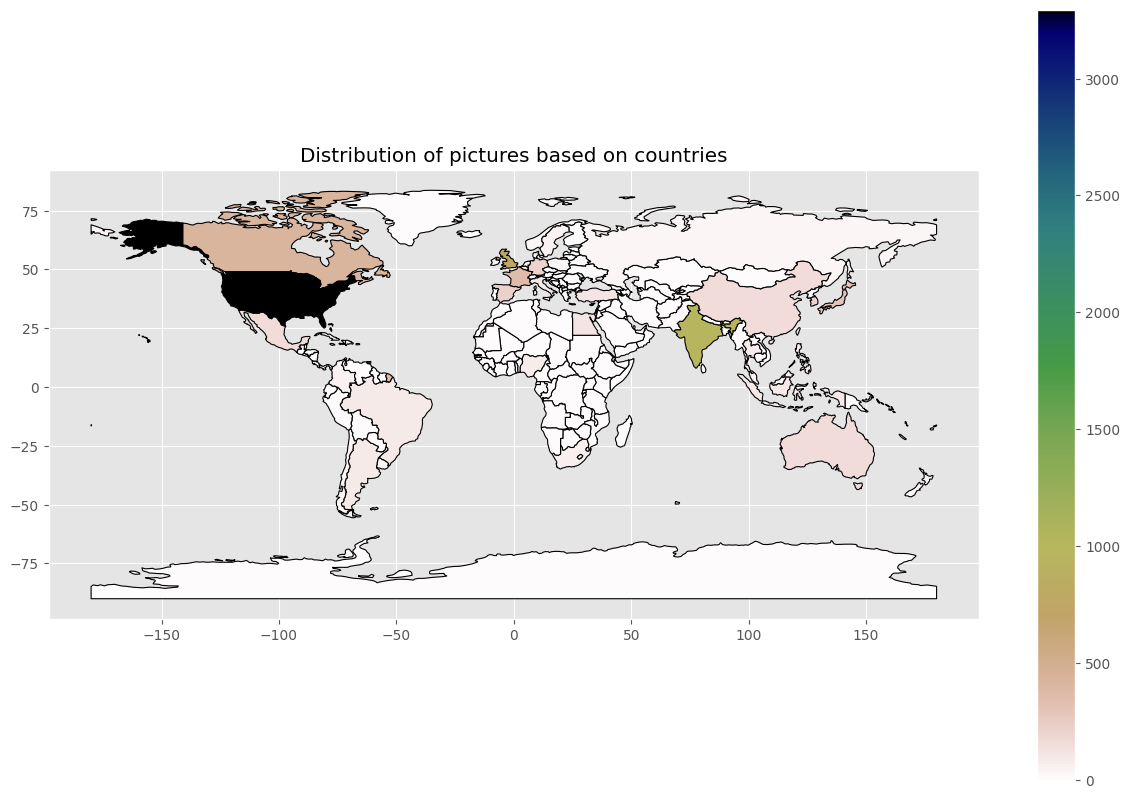

In [ ]:
# Visualizing the distribution using world map
worldmap=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data=pd.merge(worldmap,country_counts,left_on='name',right_index=True,how='left')
merged_data.rename(columns={'country':'counts'},inplace=True)
merged_data['counts']=merged_data['counts'].fillna(0)

# plotting
fig, ax = plt.subplots(figsize=(15, 10))
merged_data.plot(column='counts', linewidth=0.8,edgecolor='black',ax=ax,legend=True,cmap='gist_earth_r')
plt.title('Distribution of pictures based on countries')
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to visualize distribution of movies/tv shows across various countries.

##### 2. What is/are the insight(s) found from the chart?

Most of the movies or Tv shows are American, there are few Indian pictures followed by England, Canada and France.

#### Analyzing Titles of the Picture

In [ ]:
df['title'].tail()

7782                                       Zozo
7783                                     Zubaan
7784                          Zulu Man in Japan
7785                      Zumbo's Just Desserts
7786    ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
Name: title, dtype: object

In [ ]:
text=' '.join(title for title in df['title'] )
word_cloud=WordCloud(stopwords=STOPWORDS, background_color='white').generate(text)

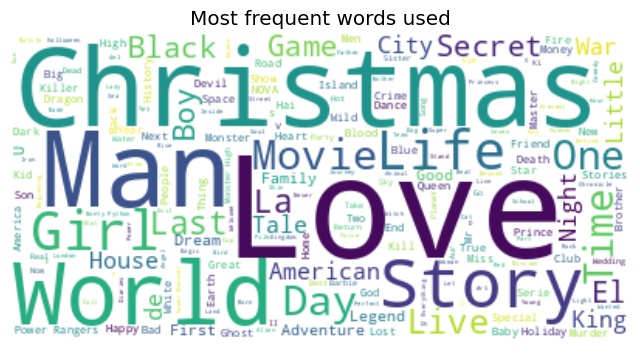

In [ ]:
# visualizing most frequent words
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.title("Most frequent words used")
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to see what are the frequent words used in the Movie/TV Show title for this dataset.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we find that the most frequent words used in the dataset are **Love, World, Christmas, Man** etc. So we can expect that movies are based on Love, Christmas and so on.

#### Release year of the Picture

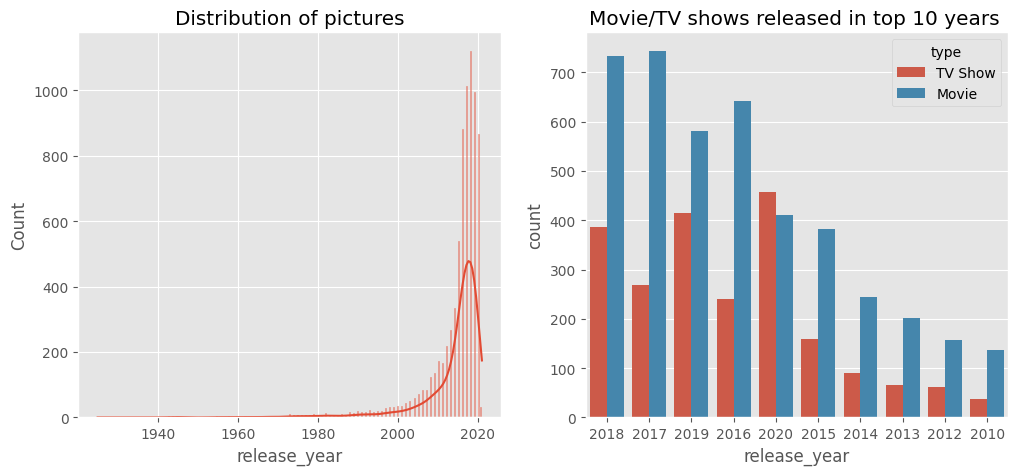

In [ ]:
# Distribution of pictures based on release year
fig, ax=plt.subplots(1,2,figsize=(12,5))
sns.histplot(df['release_year'],kde=True,ax=ax[0])
ax[0].set_title("Distribution of pictures")
sns.countplot(x='release_year',hue='type',order=df['release_year'].value_counts()[:10].index,data=df,ax=ax[1])
ax[1].set_title("Movie/TV shows released in top 10 years ")
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to look into distribution of Netflix movies and TV shows based on year.

##### 2. What is/are the insight(s) found from the chart?

We find that this Netflix primarily contains movies which are released in the year **2018, 2017, 2019, 2016, 2020**. There are very few old movies.

###**Ratings**

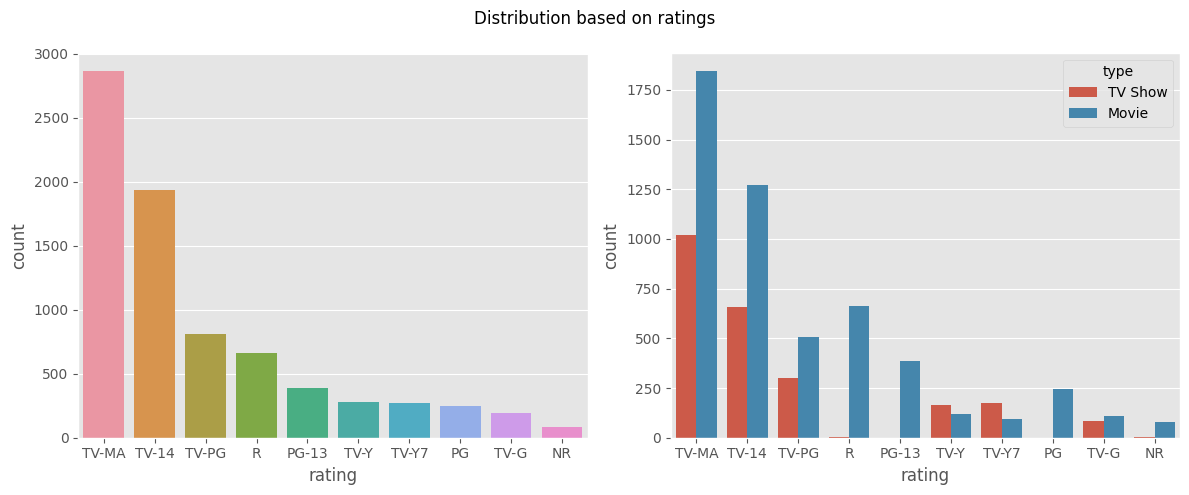

In [ ]:
# Distribution based on ratings

fig, ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot(x='rating',data=df,ax=ax[0],order=df['rating'].value_counts().index[:10])
sns.countplot(x='rating',hue='type',order=df['rating'].value_counts().index[:10],data=df,ax=ax[1])
fig.suptitle("Distribution based on ratings")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to see the rating distribution to our movies/tv shows in Netflix to understand for which audience this dataset belongs to.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we see that most of the pictures have ratings like **TV-MA, TV-14, TV-PG, which suggest that these shows are for mature audience**, and very few picture are meant for the kids.

#### **Movies/ TV show based on Generes.**

In [ ]:
mov_genres=df.loc[df['type']=='Movie']['listed_in'].str.split(", ").explode()

tv_genres=df.loc[df['type']=='TV Show']['listed_in'].str.split(", ").explode()
tv_genres

0             International TV Shows
0                          TV Dramas
0                TV Sci-Fi & Fantasy
5             International TV Shows
5                          TV Dramas
                    ...             
7779          International TV Shows
7779       Spanish-Language TV Shows
7779    Stand-Up Comedy & Talk Shows
7785          International TV Shows
7785                      Reality TV
Name: listed_in, Length: 5525, dtype: object

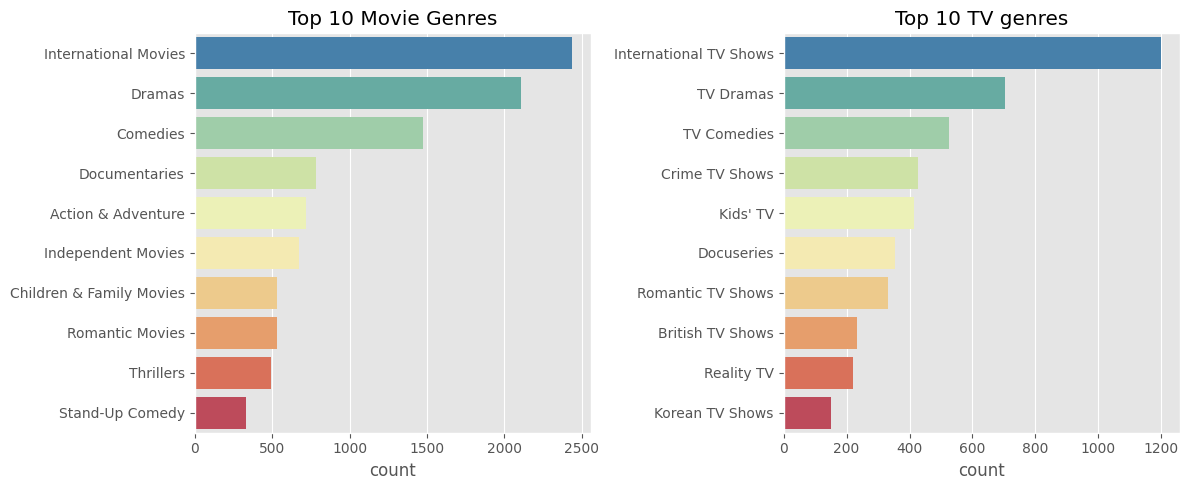

In [ ]:
# visualizing top genres for movie and tv shows
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot(y=mov_genres,order=mov_genres.value_counts().index[:10],palette='Spectral_r',ax=ax[0])
ax[0].set_title("Top 10 Movie Genres")
ax[0].set_ylabel("")
sns.countplot(y=tv_genres,order=tv_genres.value_counts().index[:10],palette='Spectral_r',ax=ax[1])
ax[1].set_title("Top 10 TV genres")
ax[1].set_ylabel("")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to see what are the top genres for Movies and TV shows that people prefer.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we find that people in genral like **international movies and shows followed by drama and comedy.**

#### **Analyzing description of Movies and Tv shows**

In [ ]:
text=' '.join(words for words in df['description'] )
word_cloud=WordCloud(stopwords=STOPWORDS, background_color='white').generate(text)

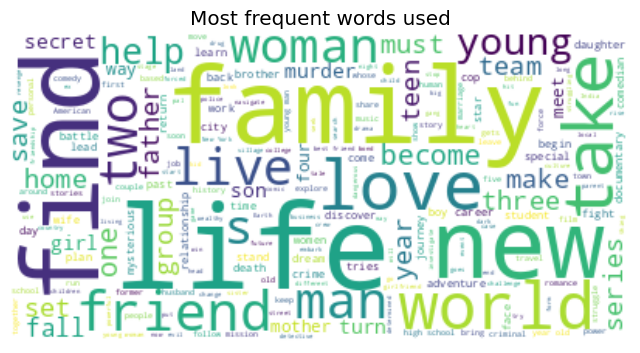

In [ ]:
# visualizing most frequent words

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.title("Most frequent words used")
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to see the most frequent used in the decription of a movie or tv show.

##### 2. What is/are the insight(s) found from the chart?

The most frequent words are **family, friend, life, love, world**  etc. This suggests that plot of the majority movie or tv show might revolve around family, friend, life, love, world.

## ***5. Feature Engineering & Data Pre-processing***

In [ ]:
# creating copy
netflix_df=df.copy()

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
month_added       10
year_added        10
dtype: int64

We see lot of missing values in column director, cast, country.

In [ ]:
# handling missing values in director, cast, country
netflix_df[['director','cast','country']]=netflix_df[['director','cast','country']].fillna('')

# dropping missing values in date_added release_year
netflix_df=netflix_df.dropna(subset=['date_added','rating'])

In [ ]:
netflix_df['rating']

0       TV-MA
1       TV-MA
2           R
3       PG-13
4       PG-13
        ...  
7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, Length: 7770, dtype: object

In [ ]:
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
year_added      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have replaced the missing value in director, cast, country as unknown and we have dropped the missing values in date_added and ratings.

### 2. Handling Outliers

In [ ]:
# let us look at our numerical columns
num_col=df.describe().columns
num_col


Index(['release_year', 'year_added'], dtype='object')

In [ ]:
df['year_added']

0       2020
1       2016
2       2018
3       2017
4       2020
        ... 
7782    2020
7783    2019
7784    2020
7785    2020
7786    2020
Name: year_added, Length: 7787, dtype: Int64

Text(0.5, 0.98, 'Outliers in numeric columns')

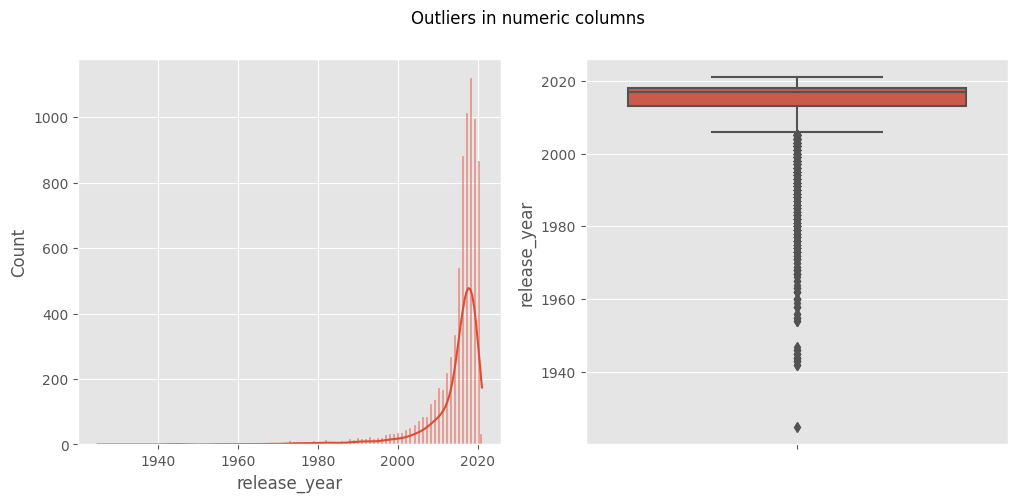

In [ ]:
# plotting these two numeric variables
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.histplot(df["release_year"],kde=True,ax=ax[0])
sns.boxplot(y=df['release_year'],ax=ax[1])
fig.suptitle("Outliers in numeric columns")


##### What all outlier treatment techniques have you used and why did you use those techniques?

Since there are only two numeric columns, rest are text data, and we won't need the numeric data for our clustering analysis, so we let the outliers be as it is.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
ratings = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}
netflix_df['rating']=netflix_df['rating'].map(ratings)

#### What all categorical encoding techniques have you used & why did you use those techniques?

We have decoded the ratings into very simple classification so that it would be easy to segment the movies and tv shows.

### 4. **Textual Data Preprocessing**
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month_added', 'year_added'],
      dtype='object')

In [ ]:
netflix_df['director'].head()

0                     
1    Jorge Michel Grau
2         Gilbert Chan
3          Shane Acker
4       Robert Luketic
Name: director, dtype: object

In [ ]:
# merging the sub-names of the director to form a single string

def director_merge(name):
  merge_name=[]
  for word in name.split(" "):
    merge_name.append(word)
  merge_name=''.join(merge_name)
  return merge_name

netflix_df['director']=netflix_df['director'].apply(director_merge)

In [ ]:
netflix_df['cast'].head()

0    João Miguel, Bianca Comparato, Michel Gomes, R...
1    Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2    Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3    Elijah Wood, John C. Reilly, Jennifer Connelly...
4    Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
Name: cast, dtype: object

In [ ]:
# similary merging the individual artists name to form a single string for a unique artist

def merging_names(text):
  new_text=[]
  for name in text.split(', '):
    new_name=name.replace(" ","")
    new_text.append(new_name)
  new_text=", ".join(new_text)
  return new_text
merging_names(netflix_df['cast'][0])
netflix_df['cast']=netflix_df['cast'].apply(merging_names)
netflix_df['cast'].head()

0    JoãoMiguel, BiancaComparato, MichelGomes, Rodo...
1    DemiánBichir, HéctorBonilla, OscarSerrano, Aza...
2    TeddChan, StellaChung, HenleyHii, LawrenceKoh,...
3    ElijahWood, JohnC.Reilly, JenniferConnelly, Ch...
4    JimSturgess, KevinSpacey, KateBosworth, AaronY...
Name: cast, dtype: object

#### 1. Expand Contraction

In [ ]:
# combining all the relevent text features which is necessary for clustering analysis

netflix_df['combined_text']=netflix_df['director']+' '+ netflix_df['cast']+ " "+ netflix_df['rating']+ ' ' \
                                 +netflix_df['listed_in']+ ' ' + netflix_df['description']

In [ ]:
netflix_df['combined_text'][0]

' JoãoMiguel, BiancaComparato, MichelGomes, RodolfoValente, VanezaOliveira, RafaelLozano, VivianePorto, MelFronckowiak, SergioMamberti, ZezéMotta, CelsoFrateschi Adults International TV Shows, TV Dramas, TV Sci-Fi & Fantasy In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

#### 2. Lower Casing

In [ ]:
# Lower Casing
def lower_casing(text):
  text=text.lower()
  return text
netflix_df['combined_text']=netflix_df['combined_text'].apply(lower_casing)

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
def remove_punctuations(text):
  text=re.sub(r'[^\w\s]','',text)
  return text
netflix_df['combined_text']=netflix_df['combined_text'].apply(remove_punctuations)

#### 4. Removing URLs & Removing words which contain digits

In [ ]:
# Remove URLs & Remove words and digits contain digits
def remove_url(text):
  text=re.sub(r'https?\S+|www\S+','',text) # removing urls
  text=re.sub(r'\w*\d+\w*','',text) # removing words which contain digits
  return text
netflix_df['combined_text']=netflix_df['combined_text'].apply(remove_url)

In [ ]:
netflix_df['combined_text'][0]

' joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira rafaellozano vivianeporto melfronckowiak sergiomamberti zezémotta celsofrateschi adults international tv shows tv dramas tv scifi  fantasy in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor'

#### 5. Removing Stopwords

In [ ]:

nltk.download('stopwords')
sw=stopwords.words('english')
np.array(sw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# Remove Stopwords
def remove_stopwords(text):
  new_text=[words for words in text.split() if words not in sw]
  new_text=' '.join(new_text)
  return new_text
netflix_df['combined_text']= netflix_df['combined_text'].apply(remove_stopwords)
netflix_df['combined_text'][0]

'joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira rafaellozano vivianeporto melfronckowiak sergiomamberti zezémotta celsofrateschi adults international tv shows tv dramas tv scifi fantasy future elite inhabit island paradise far crowded slums get one chance join saved squalor'

#### 6. Lemmatization

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def lemmatizer(text):
  lemmatizer=WordNetLemmatizer()
  lemmas=[]
  for word in text.split():
    lemma=lemmatizer.lemmatize(word,pos='v')
    lemmas.append(lemma)
  new_text=' '.join(lemmas)
  return new_text
netflix_df['combined_text']=netflix_df['combined_text'].apply(lemmatizer)


In [ ]:
netflix_df['combined_text'][0]

'joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira rafaellozano vivianeporto melfronckowiak sergiomamberti zezémotta celsofrateschi adults international tv show tv dramas tv scifi fantasy future elite inhabit island paradise far crowd slum get one chance join save squalor'

**The following steps we have done above for text preprocessing are:**  
**Step-1:** We combine all the relevent text features in the dataset into new feature called **combined_text**.    
**Step-2:** We convert all the upper cases in combined_text to lower case.  
**Step-3:** We remove all punctuations present in combined_text.  
**Step-4:** We remove all URL's and words which contain digits.  
**Step-5:** We remove all the Stopwords in the combined_text.  
**Step-6:** We do Lemmatization on combined_text this converts all the synonyms of a word into one root word.

#### 7. Tokenization

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokenized_data=netflix_df['combined_text'].copy()

In [ ]:
# Tokenization
tokenized_data=tokenized_data.apply(word_tokenize)
tokenized_data[45]

['alicanyücesoy',
 'melisasözen',
 'musauzunlar',
 'serkanercan',
 'özkanuğur',
 'ülküduru',
 'tansubiçer',
 'nadirsarıbacak',
 'sermetyeşil',
 'ayhankavas',
 'adults',
 'crime',
 'tv',
 'show',
 'international',
 'tv',
 'show',
 'tv',
 'dramas',
 'orphan',
 'subject',
 'test',
 'give',
 'superpowers',
 'rescue',
 'raise',
 'istanbuls',
 'streets',
 'fall',
 'reporter',
 'link',
 'past']

In [ ]:
tokenized_data[0]

['joãomiguel',
 'biancacomparato',
 'michelgomes',
 'rodolfovalente',
 'vanezaoliveira',
 'rafaellozano',
 'vivianeporto',
 'melfronckowiak',
 'sergiomamberti',
 'zezémotta',
 'celsofrateschi',
 'adults',
 'international',
 'tv',
 'show',
 'tv',
 'dramas',
 'tv',
 'scifi',
 'fantasy',
 'future',
 'elite',
 'inhabit',
 'island',
 'paradise',
 'far',
 'crowd',
 'slum',
 'get',
 'one',
 'chance',
 'join',
 'save',
 'squalor']

#### 8. Text Vectorization

In [ ]:
# TF-IDF

vectorizer = TfidfVectorizer(lowercase=False,max_features=10000)
X = vectorizer.fit_transform(netflix_df['combined_text'])

In [ ]:
X=X.toarray()

In [ ]:
vectorizer.get_feature_names_out()[:30]

array(['aakashdabhade', 'aamirbashir', 'aamirkhan', 'aaron',
       'aaronabrams', 'aaronburns', 'aarondouglas', 'aaroneckhart',
       'aaronjeffery', 'aaronpaul', 'aarontaylorjohnson', 'aaronyan',
       'aaronyoo', 'aashishchaudhary', 'aasifmandvi', 'abandon',
       'abbasalibhaiburmawallamastanalibhaiburmawalla', 'abbey',
       'abbiecornish', 'abbydonnelly', 'abbytrott', 'abdalahmishrif',
       'abdelaziznmila', 'abdelilahwahbi', 'abduct', 'abduction',
       'abhaydeol', 'abhimanyusingh', 'abhishekbachchan',
       'abigailbreslin'], dtype=object)

##### Which text vectorization technique have you used and why?

Here we have used TF-IDF vectorization technique, it is the best technique as it gives more importance to less frequent words, and less importance to high frequent words.

### 5. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimension reduction is needed as there are **more than 20000 features** and when we do clustering analysis of this many dimensions our program would crash.

In [ ]:
# DImensionality Reduction (If needed)

pca=PCA()
pca.fit(X)
print(pca.explained_variance_ratio_)


[1.47507829e-02 6.26262828e-03 5.68458535e-03 ... 7.45164887e-35
 6.87506576e-35 6.43302622e-35]


In [ ]:
netflix_df['rating'].head()

0    Adults
1    Adults
2    Adults
3     Teens
4     Teens
Name: rating, dtype: object

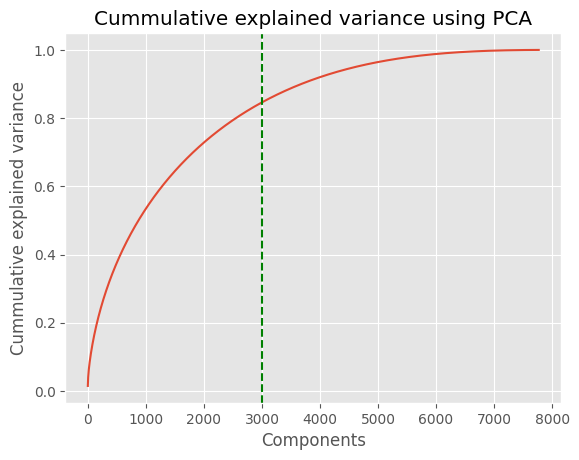

In [ ]:
# plotting to see explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axvline(x=3000,color='g',linestyle='--')
plt.xlabel("Components")
plt.ylabel("Cummulative explained variance")
plt.title("Cummulative explained variance using PCA")
plt.show()

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We have used PCA to reduce the dimension of the dataset, from the above plot we find that about 3000 components could explain about 80% of the variance.

In [ ]:
# using pca to reduce dimensions
pca=PCA(n_components=3000, random_state=0)
X_pca=pca.fit_transform(X)

In [ ]:
netflix_df['rating'].head(3)

0    Adults
1    Adults
2    Adults
Name: rating, dtype: object

In [ ]:
X_pca.shape

(7770, 3000)

## ***6. ML Model Implementation***

###**K Means**

In [ ]:

# Elbow method to determine the best value of n_clusters

sse=[]
for k in range(1,16):
  kmeans=KMeans(n_clusters=k,init='k-means++',random_state=0)
  kmeans.fit(X_pca)
  sse.append(kmeans.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

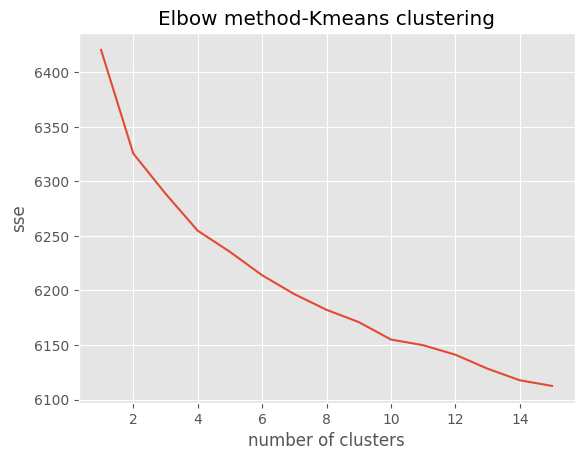

In [ ]:
# plotting sse to find optimal k value
plt.plot(range(1,16),sse)
plt.xlabel('number of clusters')
plt.ylabel('sse')
plt.title("Elbow method-Kmeans clustering")
plt.show()

From the above plot we see that as number of clusters increases the sse value decreases, it is difficult to point out the elbow from the above curve. We need a better method to find out the best value of number of clusters.

In [ ]:
netflix_df['rating'].head(3)

0    Adults
1    Adults
2    Adults
Name: rating, dtype: object

In [ ]:
# silhoutte method to find best value of k
sil_score=[]
for k in range(2,16):
  kmeans=KMeans(n_clusters=k,init='k-means++',random_state=0)
  kmeans.fit(X_pca)
  label=kmeans.labels_
  sil_score.append(silhouette_score(X_pca, label))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

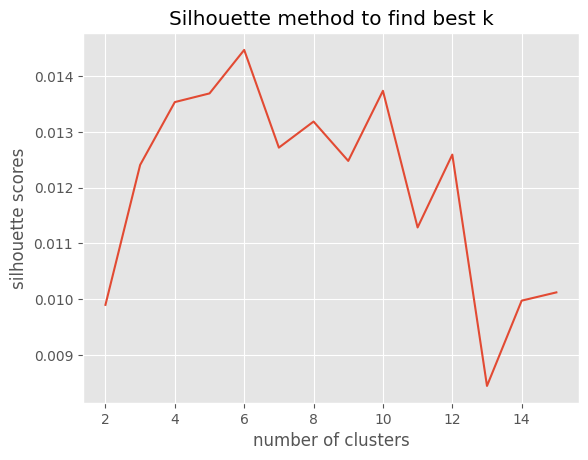

In [ ]:
# plotting silhouette scores for different clusters
plt.plot(range(2,16),sil_score)
plt.xlabel('number of clusters')
plt.ylabel('silhouette scores')
plt.title('Silhouette method to find best k')
plt.show()

The number of clusters is determined for which silhouette score is maximum, from the above plot we find that the silhouette score is maximum for k=6, hence the number of clusters which we should choose for this problem is 6.

In [ ]:
# clustering the data into 6 clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)
kmeans.fit(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

In [ ]:
# evaluation metric
kmeans_sse = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X_pca, kmeans.labels_)

In [ ]:
print("sse for 6 clusters is:",kmeans_sse)
print("silhouette_score for 6 clusters is",kmeans_silhouette_score)

sse for 6 clusters is: 6213.976191049532
silhouette_score for 6 clusters is 0.014467557210595037


In [ ]:
netflix_df['rating'].value_counts()

Adults          3617
Young Adults    1928
Older Kids      1327
Kids             512
Teens            386
Name: rating, dtype: int64

In [ ]:
# labelling the dataset
kmeans.labels_
netflix_df['clustering_label']=kmeans.labels_
netflix_df.sample(5)

show_id     type                     title                  director  \
5728   s5729    Movie              Soul to Keep  DavidAllensworth,Monière   
3674   s3675    Movie  Little Singham: Mahabali              PrakashSatam   
2535   s2536  TV Show                 Greenleaf                             
7406   s7407  TV Show                Versailles                             
1937   s1938    Movie          Ek Jaan Hain Hum                RajivMehra   

                                                   cast         country  \
5728  SandraMaeFrank, AuroraHeimbach, CraigFogel, To...   United States   
3674  SaumyaDaan, SonalKaushal, AnamayaVerma, Ganesh...                   
2535  MerleDandridge, KimHawthorne, DesireeRoss, Lam...   United States   
7406  GeorgeBlagden, AlexanderVlahos, TyghRunyan, St...  France, Canada   
1937  RajivKapoor, DivyaRana, ShammiKapoor, Tanuja, ...           India   

     date_added  release_year        rating   duration  \
5728 2019-07-01          2019        Adults     94 min   
3674 2019-11-27          2019    Older Kids     69 min   
2535 2020-09-10          2020  Young Adults  5 Seasons   
7406 2019-03-29          2018        Adults  3 Seasons   
1937 2017-09-01          1983  Young Adults    151 min   

                                           listed_in  \
5728               Horror Movies, Independent Movies   
3674              Children & Family Movies, Comedies   
2535                                       TV Dramas   
7406               International TV Shows, TV Dramas   
1937  Dramas, International Movies, Music & Musicals   

                                            description month_added  \
5728  Two siblings invite friends to their inherited...        July   
3674  In a journey back in time to the ancient city ...    November   
2535  Although members of the Greenleaf family run a...   September   
7406  King Louis XIV of France commissions a lavish ...       March   
1937  While trying to win over his beloved’s parents...   September   

      year_added                                      combined_text  \
5728        2019  davidallensworthmonière sandramaefrank aurorah...   
3674        2019  prakashsatam saumyadaan sonalkaushal anamayave...   
2535        2020  merledandridge kimhawthorne desireeross lamman...   
7406        2019  georgeblagden alexandervlahos tyghrunyan stuar...   
1937        2017  rajivmehra rajivkapoor divyarana shammikapoor ...   

      clustering_label  
5728                 1  
3674                 0  
2535                 1  
7406                 5  
1937                 1

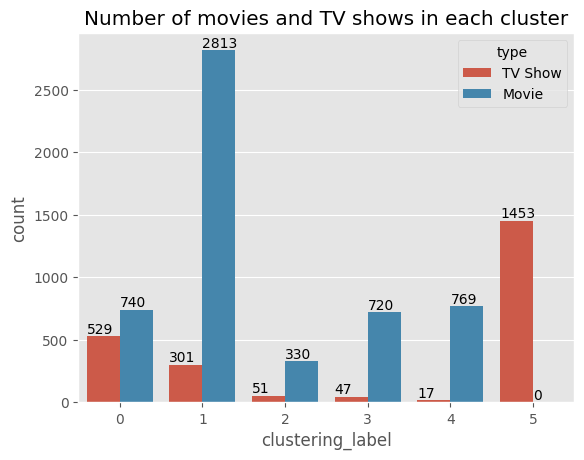

In [ ]:
# visualizing cluster distribution
bars=sns.countplot(x='clustering_label',data=netflix_df,hue='type')
plt.title("Number of movies and TV shows in each cluster")
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 25, format(yval,'.0f'))

#### **Analyzing key content present in clusters.**

In [ ]:
def kmeans_wordcloud(cluster_num):
  content_df=netflix_df[netflix_df['clustering_label']==cluster_num]['description']
  description_words=[]
  for text in content_df:
    for words in text.split():
      description_words.append(words)

  new_text=' '.join(description_words)
  word_cloud=WordCloud(stopwords=STOPWORDS,background_color='white').generate(new_text)
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


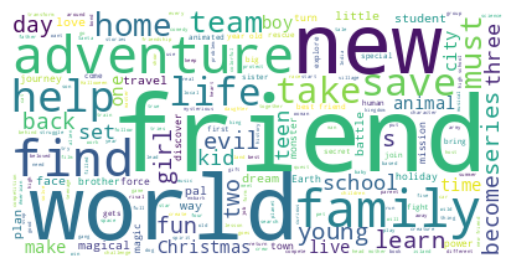

In [ ]:
# key content in cluster 0
kmeans_wordcloud(0)

In [ ]:
netflix_df[netflix_df['clustering_label']==0].sample(8)[['title','rating','listed_in']]

title      rating  \
4666                          Operation Christmas Drop        Kids   
6880                                        The Smurfs  Older Kids   
6036             Th Eena Meena Deeka Chase Comedy Show  Older Kids   
1994                                         Emogenius  Older Kids   
4983  Prohibition: A Film by Ken Burns and Lynn Novick  Older Kids   
3561                            LeapFrog: Phonics Farm        Kids   
4428                      Nature: Animals With Cameras  Older Kids   
7612                      Whose Vote Counts, Explained  Older Kids   

                                              listed_in  
4666  Children & Family Movies, Comedies, Romantic M...  
6880                 Children & Family Movies, Comedies  
6036                              Kids' TV, TV Comedies  
1994                                         Reality TV  
4983                         Crime TV Shows, Docuseries  
3561                                             Movies  
4428                    Docuseries, Science & Nature TV  
7612                                         Docuseries

From the above wordcloud for cluster 0, we see that frequent words include words like **friend, world, new, adventure, kid, etc.** We also looked into the ratings and genre of the movies and shows which belong to cluster 0, from these two we can conclude that **most of the movies and shows in this cluster are for kids.**

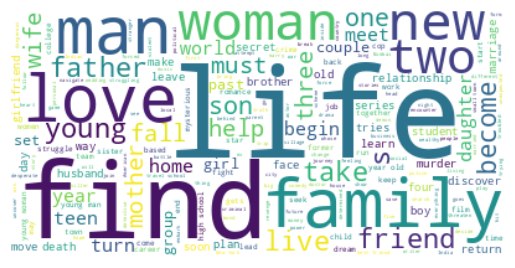

In [ ]:
# key content in cluster 1
kmeans_wordcloud(1)

In [ ]:
netflix_df[netflix_df['clustering_label']==1].sample(8)[['title','rating','listed_in']]

title        rating  \
4767                                Paranormal Activity        Adults   
6528                           The Kindergarten Teacher        Adults   
6181                                   The Bridge Curse        Adults   
5318                                             Rustom  Young Adults   
4166                                 Mokalik (Mechanic)  Young Adults   
714                                        Banana Split        Adults   
6504                                The Invisible Guest  Young Adults   
2533  Green White Green (And All the Beautiful Colou...        Adults   

                                              listed_in  
4767                           Horror Movies, Thrillers  
6528                         Dramas, Independent Movies  
6181     Horror Movies, International Movies, Thrillers  
5318                       Dramas, International Movies  
4166                       Dramas, International Movies  
714                Comedies, Dramas, Independent Movies  
6504                    International Movies, Thrillers  
2533  Comedies, Independent Movies, International Mo...

From the above wordcloud for cluster 1, we see that frequent words include words like **life, find, family, love, men, women.** We also looked into the ratings and genre of the movies and shows which belong to cluster 1, from these two and wordcloud we can conclude that **most of the movies and shows in this cluster are dramas, thrillers and horrors.**

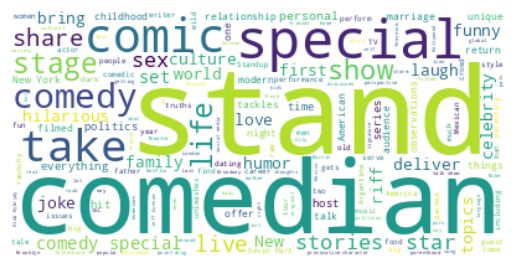

In [ ]:
# key content in cluster 2
kmeans_wordcloud(2)

In [ ]:
netflix_df[netflix_df['clustering_label']==2].sample(8)[['title','rating','listed_in']]

title        rating  \
4124             Miranda Sings Live…Your Welcome  Young Adults   
5198    Ricardo Quevedo: Los amargados somos más        Adults   
1443         Coco y Raulito: Carrusel de ternura        Adults   
3154            Jerry Seinfeld: 23 Hours To Kill    Older Kids   
1696          Demetri Martin: Live (At the Time)        Adults   
1357                           Chris Tucker Live        Adults   
3146              Jen Kirkman: Just Keep Livin’?        Adults   
3939  Maria Bamford: The Special Special Special        Adults   

            listed_in  
4124  Stand-Up Comedy  
5198  Stand-Up Comedy  
1443  Stand-Up Comedy  
3154  Stand-Up Comedy  
1696  Stand-Up Comedy  
1357  Stand-Up Comedy  
3146  Stand-Up Comedy  
3939  Stand-Up Comedy

From the above wordcloud for cluster 2, we see that frequent words include words like **Comedy and stand.** We also looked into the ratings and genre of the movies and shows which belong to cluster 2, from these two and wordcloud we can conclude that **most of the movies and shows are comedy and stand up comedy shows**

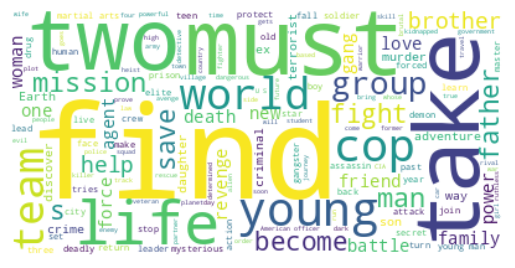

In [ ]:
# key content in cluster 3
kmeans_wordcloud(3)

In [ ]:
netflix_df[netflix_df['clustering_label']==3].sample(8)[['title','rating','listed_in']]

title        rating  \
3009                     Insan  Young Adults   
6919  The Taking of Pelham 123        Adults   
5268              Romeo Ranjha  Young Adults   
4579             Officer Downe        Adults   
2114                    Faraar  Young Adults   
4794             Patriot Games        Adults   
6474       The Hurricane Heist         Teens   
4442              Needhi Singh  Young Adults   

                                             listed_in  
3009  Action & Adventure, Dramas, International Movies  
6919                                Action & Adventure  
5268    Action & Adventure, Comedies, Music & Musicals  
4579                                Action & Adventure  
2114  Action & Adventure, Dramas, International Movies  
4794                                Action & Adventure  
6474                                Action & Adventure  
4442  Action & Adventure, Dramas, International Movies

From the above wordcloud for cluster 3, we see that frequent words include words like **find, must, two, take, world.** We also looked into the ratings and genre of the movies and shows which belong to cluster 3, from these two and wordcloud we can conclude that **most of the movies and shows in this cluster are Action and adventure based movies and shows.**

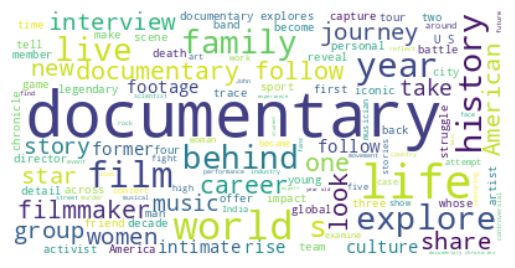

In [ ]:
# key content in cluster 4
kmeans_wordcloud(4)

In [ ]:
netflix_df[netflix_df['clustering_label']==4].sample(8)[['title','rating','listed_in']]

title        rating  \
5492                                         Senna         Teens   
2229                         For the Love of Spock  Young Adults   
3176                                  Jimi Hendrix        Adults   
4627  Once in a Lifetime Sessions with OneRepublic    Older Kids   
6548                   The Land of the Enlightened        Adults   
4229                              Mortified Nation        Adults   
5136                                     Red Trees    Older Kids   
7559                      What Makes a Psychopath?  Young Adults   

                                              listed_in  
5492  Documentaries, International Movies, Sports Mo...  
2229                                      Documentaries  
3176                    Documentaries, Music & Musicals  
4627                    Documentaries, Music & Musicals  
6548                Documentaries, International Movies  
4229                                      Documentaries  
5136                Documentaries, International Movies  
7559                                      Documentaries

From the above wordcloud for cluster 4, we see that frequent words include words like **documentary, history, life** We also looked into the ratings and genre of the movies and shows which belong to cluster 4, from these two and wordcloud we can conclude that **most of the movies and shows in this cluster are documentary based movies and shows.**

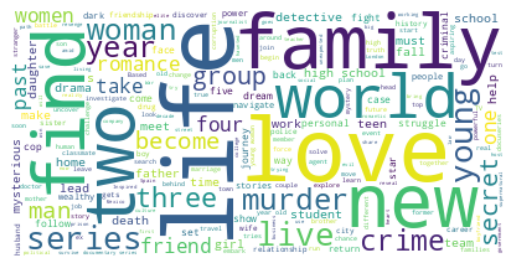

In [ ]:
# key content in cluster 5
kmeans_wordcloud(5)

In [ ]:
netflix_df[netflix_df['clustering_label']==5].sample(8)[['title','rating','listed_in']]

title        rating  \
5913                           SuperNature: Wild Flyers    Older Kids   
3782                                   Love Your Garden          Kids   
7358                                           Unriddle  Young Adults   
3279  Kabaneri of the Iron Fortress: The Battle of U...        Adults   
2443                                     Glowing Embers  Young Adults   
359                                      Ajaibnya Cinta    Older Kids   
4077                                     Midnight Diner        Adults   
992                                           Bloodride        Adults   

                                              listed_in  
5913  British TV Shows, Docuseries, Science & Nature TV  
3782  British TV Shows, International TV Shows, Real...  
7358  Crime TV Shows, International TV Shows, TV Dramas  
3279    Anime Series, International TV Shows, TV Horror  
2443                  International TV Shows, TV Dramas  
359                   International TV Shows, TV Dramas  
4077                  International TV Shows, TV Dramas  
992     International TV Shows, TV Horror, TV Mysteries

From the above wordcloud for cluster 5, we see that frequent words include words like **love, life, family.** We also looked into the ratings and genre of the movies and shows which belong to cluster 5, from these two and wordcloud we can conclude that **most of them are romantic movies and shows.**

#### KMeans Summary

In our first ML model implementation we have formed a total of 6 clusters, each of the clusters contain specific group of movies and shows.  

**Cluster 0:** This cluster contains lot of **cartoons and animes** which are for kids.  
**Cluster 1:** This cluster contains lot of **dramas, thriller and horror** movies and shows.  
**Cluster 2:** This cluster contains lot of **comedy and standup comedies**.  
**Cluster 3:** This cluster contains lot of **action and adventure movies and shows.**  
**Cluster 4:** This cluster contains lot of **documentary and docuseries.**  
**Cluster 5:** This cluster contains lot of **Romantic movies and shows.**

### **Hierarchial clustering**

In [ ]:
# plotting dendogram to determine optimum clusters

Z = linkage(X_pca, method='ward')


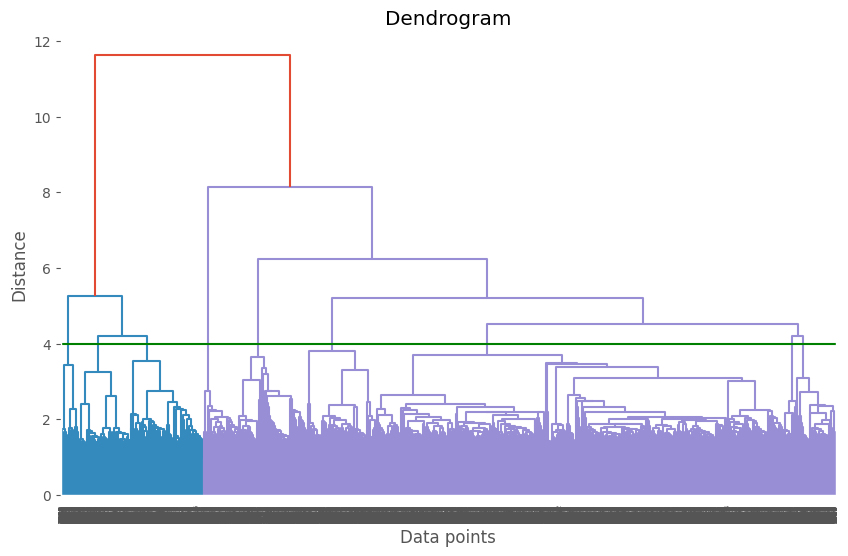

In [ ]:
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.axhline(y=4,color='green')
plt.title('Dendrogram')
plt.show()

From the Dendogram above the **we see that at distance=4 seems to be optimal cut point**, and we get a total of **9 clusters** based on that cut point.

In [ ]:
# implementing agglomerative clustering

agg_model = AgglomerativeClustering(n_clusters=9, linkage='ward', affinity='euclidean')
agg_model.fit(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=9)

In [ ]:
agg_model.labels_
netflix_df['hierc_cluster_label']=agg_model.labels_
netflix_df.sample(5)

show_id     type                    title         director  \
2448   s2449  TV Show        Go! Live Your Way                    
5739   s5740    Movie                 Sparring       SamuelJouy   
4791   s4792    Movie                   Patria  MatíasGueilburt   
4572   s4573    Movie  Oddbods: Party Monsters                    
2240   s2241    Movie             Forever Pure    MayaZinshtein   

                                                   cast  \
2448  PilarPascual, RenataToscano, JoséGiménezZapiol...   
5739  MathieuKassovitz, OliviaMerilahti, SouleymaneM...   
4791                                 PacoIgnacioTaiboII   
4572  NadiaRamlee, ChioSu-Ping, JeremyLinn, MarlonDa...   
2240                                                      

                             country date_added  release_year      rating  \
2448                       Argentina 2019-06-21          2019  Older Kids   
5739                          France 2018-09-01          2017      Adults   
4791                          Mexico 2019-01-18          2019      Adults   
4572                                 2018-10-19          2018        Kids   
2240  United Kingdom, Israel, Russia 2017-05-29          2016      Adults   

       duration                                          listed_in  \
2448  2 Seasons  Kids' TV, Spanish-Language TV Shows, Teen TV S...   
5739     94 min        Dramas, International Movies, Sports Movies   
4791     90 min                Documentaries, International Movies   
4572     23 min                                             Movies   
2240     87 min  Documentaries, International Movies, Sports Mo...   

                                            description month_added  \
2448  Charismatic Mía gets a scholarship to an elite...        June   
5739  A middle-aged boxer with a mixed record become...   September   
4791  Paco Ignacio Taibo II brings his book trilogy ...     January   
4572  Dressed up as detective Sherlock Holmes, Slick...     October   
2240  The furor over the addition of two Muslim play...         May   

      year_added                                      combined_text  \
2448        2019  pilarpascual renatatoscano joségiménezzapiola ...   
5739        2018  samueljouy mathieukassovitz oliviamerilahti so...   
4791        2019  matíasgueilburt pacoignaciotaiboii adults docu...   
4572        2018  nadiaramlee chiosuping jeremylinn marlondanceh...   
2240        2017  mayazinshtein adults documentaries internation...   

      clustering_label  hierc_cluster_label  
2448                 5                    7  
5739                 1                    2  
4791                 4                    0  
4572                 1                    2  
2240                 4                    0

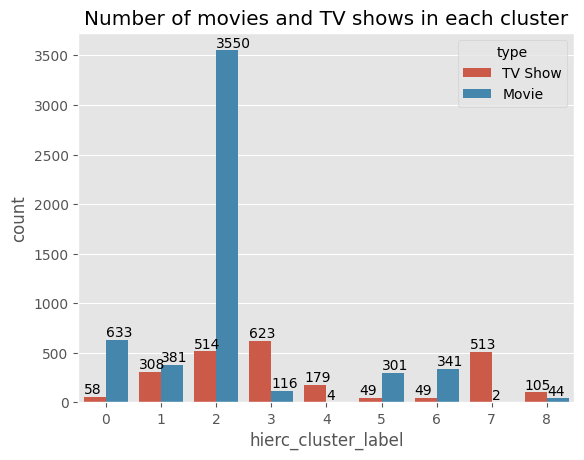

In [ ]:
bars=sns.countplot(x='hierc_cluster_label',data=netflix_df,hue='type')
plt.title("Number of movies and TV shows in each cluster")
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 30, format(yval,'.0f'))

1. First we have found our optimal number of clusters which is 9.  
2. After first step we have implemented **agglomerative clustering with ward linkage.**
3. We have plotted the distribution of movies and tv shows for each of these clusters.  

In [ ]:
def hierachial_wordcloud(cluster_num):
  content_df=netflix_df[netflix_df['hierc_cluster_label']==cluster_num]['description']
  description_words=[]
  for text in content_df:
    for words in text.split():
      description_words.append(words)

  new_text=' '.join(description_words)
  word_cloud=WordCloud(stopwords=STOPWORDS,background_color='white').generate(new_text)
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


#### **Looking to understand the content present in the clusters**

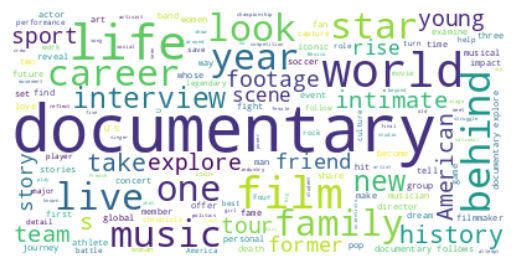

In [ ]:
# key content in cluster 0
hierachial_wordcloud(0)

In [ ]:
netflix_df[netflix_df['hierc_cluster_label']==0].sample(8)[['title','rating','listed_in']]

title        rating  \
5103  Ratones Paranoicos: The Band that Rocked Argen...        Adults   
860                                     Betting on Zero    Older Kids   
2245                                  Forks Over Knives    Older Kids   
5771                            Springsteen on Broadway        Adults   
5229                                       ROAD TO ROMA    Older Kids   
968                         BLACKPINK: Light Up the Sky  Young Adults   
463    American Factory: A Conversation with the Obamas          Kids   
5204                                       RIDE ON TIME    Older Kids   

                                              listed_in  
5103  Documentaries, International Movies, Music & M...  
860                                       Documentaries  
2245                                      Documentaries  
5771                                   Music & Musicals  
5229                Documentaries, International Movies  
968                     Documentaries, Music & Musicals  
463                                       Documentaries  
5204                 Docuseries, International TV Shows

From the above wordcloud for cluster 0, we see that frequent words include words like **documentary, world, career, life** We also looked into the ratings and genre of the movies and shows which belong to cluster 0, from these two and wordcloud we can conclude that **most of them are documentary or docuseries.**

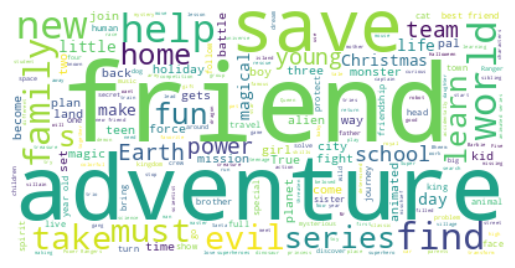

In [ ]:
# key content in cluster 1
hierachial_wordcloud(1)

In [ ]:
netflix_df[netflix_df['hierc_cluster_label']==1].sample(8)[['title','rating','listed_in']]

title        rating  \
488   An American Tail: The Treasures of Manhattan I...          Kids   
7194            Transformers: War For Cybertron Trilogy  Young Adults   
4991                                           Prospect        Adults   
1597                   Danger Mouse: Classic Collection          Kids   
4570                 Octonauts & the Great Barrier Reef          Kids   
5701                             Some Assembly Required          Kids   
3023                          Instructions Not Included         Teens   
4240                                       Motown Magic          Kids   

                                    listed_in  
488                  Children & Family Movies  
7194                             Anime Series  
4991              Sci-Fi & Fantasy, Thrillers  
1597  British TV Shows, Kids' TV, TV Comedies  
4570                 Children & Family Movies  
5701                    Kids' TV, TV Comedies  
3023   Comedies, Dramas, International Movies  
4240                                 Kids' TV

From the above wordcloud for cluster 1, we see that frequent words include words like **friend, adventure, world, save, find** We also looked into the ratings and genre of the movies and shows which belong to cluster 1, from these two and wordcloud we can conclude that **most of them are cartoons and animes for kids**

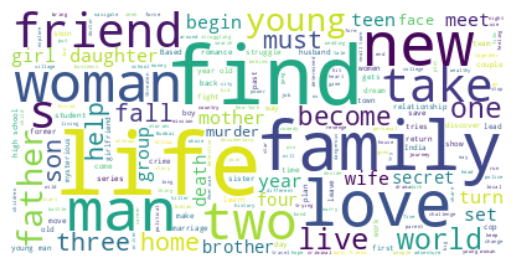

In [ ]:
# key content in cluster 2
hierachial_wordcloud(2)

In [ ]:
netflix_df[netflix_df['hierc_cluster_label']==2].sample(8)[['title','rating','listed_in']]

title        rating  \
2169                           Finding Agnes    Older Kids   
6696  The Naked Gun 2 1/2: The Smell of Fear         Teens   
1224                                   Carol        Adults   
4652                              One on One  Young Adults   
4281               Mundeyan Ton Bachke Rahin  Young Adults   
4261                               Mr. Young          Kids   
6414                        The Great Battle        Adults   
6262                       The Da Vinci Code         Teens   

                                             listed_in  
2169                      Dramas, International Movies  
6696                                          Comedies  
1224             Dramas, LGBTQ Movies, Romantic Movies  
4652                        TV Comedies, Teen TV Shows  
4281  Comedies, International Movies, Music & Musicals  
4261                             Kids' TV, TV Comedies  
6414  Action & Adventure, Dramas, International Movies  
6262                                         Thrillers

From the above wordcloud for cluster 2, we see that frequent words include words like **love, life, family, find, man, women.** We also looked into the ratings and genre of the movies and shows which belong to cluster 2, from these two and wordcloud we can conclude that **it is a mixture of comedy, drama, family, documentary**. It basically contains movies and shows which are related to **life and family**.

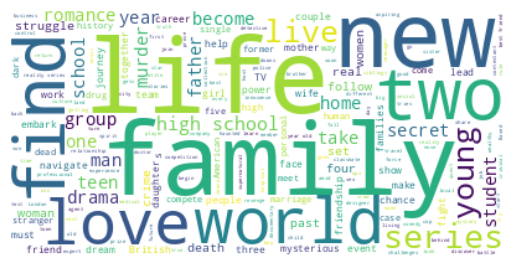

In [ ]:
# key content in cluster 3
hierachial_wordcloud(3)

In [ ]:
netflix_df[netflix_df['hierc_cluster_label']==3].sample(8)[['title','rating','listed_in']]

title        rating  \
1624                     DASH & LILY  Young Adults   
7411                           Vexed        Adults   
6372                     The Fosters  Young Adults   
6495                   The Innocents        Adults   
334   Agatha and the Truth of Murder        Adults   
6390                 The Ghost Bride  Young Adults   
956                     Black Mirror        Adults   
6140                   The Blacklist  Young Adults   

                                              listed_in  
1624          Romantic TV Shows, TV Comedies, TV Dramas  
7411  British TV Shows, Crime TV Shows, Internationa...  
6372                                          TV Dramas  
6495  British TV Shows, International TV Shows, Roma...  
334                                              Dramas  
6390    International TV Shows, TV Dramas, TV Mysteries  
956   British TV Shows, International TV Shows, TV D...  
6140            Crime TV Shows, TV Dramas, TV Thrillers

From the above wordcloud for cluster 3, we see that frequent words include words like **life, family, high school, love, world** We also looked into the ratings and genre of the movies and shows which belong to cluster 5, from these two and wordcloud we can conclude that **this cluster in majority contains movies and shows about things around high school stuff more for teens and young adults.**

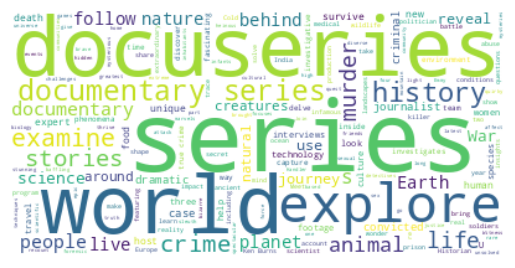

In [ ]:
# key content in cluster 4
hierachial_wordcloud(4)

In [ ]:
netflix_df[netflix_df['hierc_cluster_label']==4].sample(8)[['title','rating','listed_in']]

title        rating  \
1073                         Brain Games          Kids   
142               9 Months That Made You    Older Kids   
6669                 The Mind, Explained  Young Adults   
3015  Inside the Mind of a Serial Killer  Young Adults   
2731                          High Score  Young Adults   
5275           Room 2806: The Accusation        Adults   
2000                Encounters with Evil  Young Adults   
4433                 Nature's Great Race    Older Kids   

                                              listed_in  
1073                    Docuseries, Science & Nature TV  
142   British TV Shows, Docuseries, Science & Nature TV  
6669                    Docuseries, Science & Nature TV  
3015                         Crime TV Shows, Docuseries  
2731                    Docuseries, Science & Nature TV  
5275  Crime TV Shows, Docuseries, International TV S...  
2000       British TV Shows, Crime TV Shows, Docuseries  
4433  British TV Shows, Docuseries, Science & Nature TV

From the above wordcloud for cluster 4, we see that frequent words include words like **documentary and docuseries.** We also looked into the ratings and genre of the movies and shows which belong to cluster 4, from these two and wordcloud we can conclude that **most of them are documentaries and docuseries more based towards crime.**

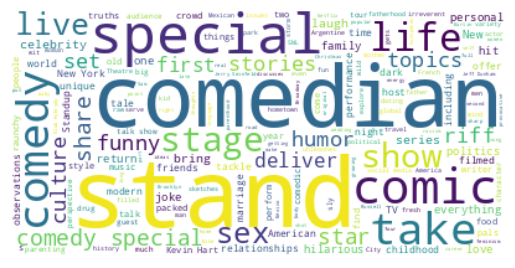

In [ ]:
# key content in cluster 5
hierachial_wordcloud(5)

In [ ]:
netflix_df[netflix_df['hierc_cluster_label']==5].sample(8)[['title','rating','listed_in']]

title      rating  \
5435                          Schulz Saves America      Adults   
3604                    Leslie Jones: Time Machine      Adults   
550   Anthony Jeselnik: Fire in the Maternity Ward      Adults   
5453             Sebastian Maniscalco: Stay Hungry      Adults   
1310            Chelsea Peretti: One of the Greats      Adults   
3934                       Marco Luque: Tamo Junto      Adults   
3099                      Jack Whitehall: At Large      Adults   
3207           John Mulaney & The Sack Lunch Bunch  Older Kids   

                                      listed_in  
5435  Stand-Up Comedy & Talk Shows, TV Comedies  
3604                            Stand-Up Comedy  
550                             Stand-Up Comedy  
5453                            Stand-Up Comedy  
1310                            Stand-Up Comedy  
3934                            Stand-Up Comedy  
3099                            Stand-Up Comedy  
3207         Children & Family Movies, Comedies

From the above wordcloud for cluster 5, we see that frequent words include words like **comic, comedian, stand up** We also looked into the ratings and genre of the movies and shows which belong to cluster 5, from these two and wordcloud we can conclude that **this cluster majorly contains comedy movies and shows.**

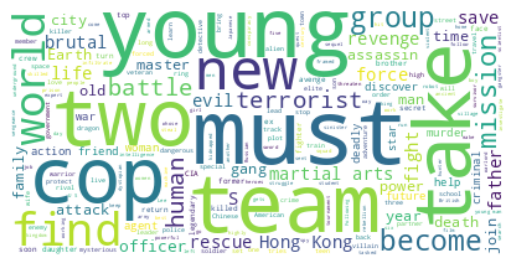

In [ ]:
# key content in cluster 6
hierachial_wordcloud(6)

In [ ]:
netflix_df[netflix_df['hierc_cluster_label']==6].sample(8)[['title','rating','listed_in']]

title        rating  \
298                          Act of Valor        Adults   
1741           Di Renjie zhi Sidatianwang  Young Adults   
5155     ReMastered: Who Shot the Sheriff  Young Adults   
3                                       9         Teens   
6097                       The Assignment        Adults   
6435  The Hateful Eight: Extended Version        Adults   
5479                             Security        Adults   
6026                 Terminator Salvation         Teens   

                                              listed_in  
298                                  Action & Adventure  
1741  Action & Adventure, International Movies, Sci-...  
5155                    Documentaries, Music & Musicals  
3     Action & Adventure, Independent Movies, Sci-Fi...  
6097                                 Action & Adventure  
6435                                           TV Shows  
5479                                 Action & Adventure  
6026               Action & Adventure, Sci-Fi & Fantasy

From the above wordcloud for cluster 5, we see that frequent words include words like **team, young, must** We also looked into the ratings and genre of the movies and shows which belong to cluster 5, from these two and wordcloud we can conclude that **this cluster in majority contains action and adventure movies and shows.**

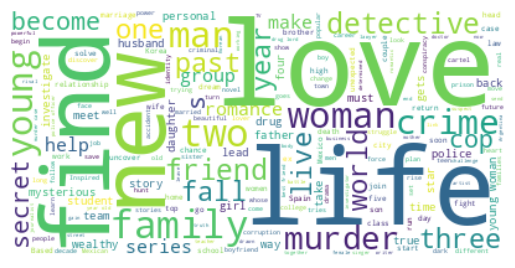

In [ ]:
# key content in cluster 7
hierachial_wordcloud(7)

In [ ]:
netflix_df[netflix_df['hierc_cluster_label']==7].sample(8)[['title','rating','listed_in']]

title        rating  \
2644   Hashoter Hatov        Adults   
4964        President  Young Adults   
180       A Good Wife  Young Adults   
2864         Humsafar    Older Kids   
7620    Wild District        Adults   
2282        Frequency  Young Adults   
4977  Prison Playbook        Adults   
2492  Goodbye My Wife  Young Adults   

                                              listed_in  
2644  Crime TV Shows, International TV Shows, TV Com...  
4964  International TV Shows, Korean TV Shows, TV Dr...  
180   International TV Shows, Romantic TV Shows, TV ...  
2864  International TV Shows, Romantic TV Shows, TV ...  
7620  Crime TV Shows, International TV Shows, Spanis...  
2282            Crime TV Shows, TV Dramas, TV Mysteries  
4977  International TV Shows, Korean TV Shows, TV Co...  
2492  International TV Shows, Korean TV Shows, Roman...

From the above wordcloud for cluster 6, we see that frequent words include words like **love, life, find.** We also looked into the ratings and genre of the movies and shows which belong to cluster 6, from these two and wordcloud we can conclude that **most of the, are romantic movies and shows.**

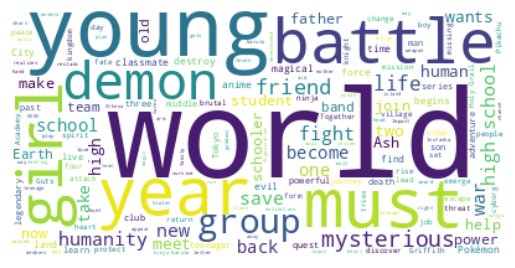

In [ ]:
# key content in cluster 8
hierachial_wordcloud(8)

In [ ]:
netflix_df[netflix_df['hierc_cluster_label']==8].sample(8)[['title','rating','listed_in']]

title        rating  \
3422                                 Knights of Sidonia        Adults   
3852                          Magi: Adventure of Sinbad  Young Adults   
7306                                Ultramarine Magmell  Young Adults   
4407                    Naruto Shippuden : Blood Prison  Young Adults   
5129                            Record of Grancrest War        Adults   
3038  Inuyasha the Movie - La spada del dominatore d...  Young Adults   
4204                          Monthly Girls' Nozaki Kun    Older Kids   
4657                                      One-Punch Man  Young Adults   

                                              listed_in  
3422               Anime Series, International TV Shows  
3852               Anime Series, International TV Shows  
7306               Anime Series, International TV Shows  
4407  Action & Adventure, Anime Features, Internatio...  
5129                                       Anime Series  
3038  Action & Adventure, Anime Features, Internatio...  
4204                    Anime Series, Romantic TV Shows  
4657  Anime Series, Crime TV Shows, International TV...

From the above wordcloud for cluster 8, we see that frequent words include words like **young, world, demon, girl.** We also looked into the ratings and genre of the movies and shows which belong to cluster 8, from these two and wordcloud we can conclude that **this cluster in majority contains anime series and movies.**

### **Hierarchial clustering summary**

In Agglomerative clustering implementation we have formed a total of 9 clusters, each of the clusters contain specific group of movies and shows.  

**Cluster 0:** This cluster contains lot of **documentary movies**.  
**Cluster 1:** This cluster contains lot of **cartoon and animes** for kids.  
**Cluster 2:** This cluster contains movies and tv shows which focuses about **life and family.**  
**Cluster 3:** This cluster contains **high school drama and thriller**.  
**Cluster 4:** This cluster contains lot of **documentary and docuseries based on crime**.  
**Cluster 5:** This cluster contains lot of **Comedy movies and shows**.   
**Cluster 6:** This cluster contains lot of **Action and Adventure movies.**   
**Cluster 7:** This cluster contains **romantic movies and tv shows.**

### **Recommendation system**

* In Recommendation system we input one movie and it will recommend 10 similar movies or tv shows to our input movie, we use **Content based recommendation** system and use **cosine similarlity** to compute similarity scores between two items.  

* Here we will build a recommender system which will recommend 10 similar movies or shows to our input movie.

In [ ]:
recommender_df=netflix_df.copy()

In [ ]:
recommender_df['combined_text']

0       joãomiguel biancacomparato michelgomes rodolfo...
1       jorgemichelgrau demiánbichir héctorbonilla osc...
2       gilbertchan teddchan stellachung henleyhii law...
3       shaneacker elijahwood johncreilly jenniferconn...
4       robertluketic jimsturgess kevinspacey katebosw...
                              ...                        
7782    joseffares imadcreidi antoinetteturk eliasgerg...
7783    mozezsingh vickykaushal sarahjanedias raaghavc...
7784    nastyc adults documentaries international movi...
7785    adrianozumbo rachelkhoo older kid internationa...
7786    samdunn adults documentaries music musicals do...
Name: combined_text, Length: 7770, dtype: object

In [ ]:
recommender_df.shape

(7770, 17)

In [ ]:
recommender_df=recommender_df[['title','combined_text']]
recommender_df.head()

title                                      combined_text
0     3%  joãomiguel biancacomparato michelgomes rodolfo...
1   7:19  jorgemichelgrau demiánbichir héctorbonilla osc...
2  23:59  gilbertchan teddchan stellachung henleyhii law...
3      9  shaneacker elijahwood johncreilly jenniferconn...
4     21  robertluketic jimsturgess kevinspacey katebosw...

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer=CountVectorizer()
X_cv=count_vectorizer.fit_transform(recommender_df['combined_text'])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim=cosine_similarity(X_pca)
print(cosine_sim)

[[ 1.00000000e+00 -2.02620208e-02  4.16812593e-02 ... -2.65680852e-02
   3.12928777e-02 -2.68525007e-02]
 [-2.02620208e-02  1.00000000e+00  1.25198540e-03 ...  5.09074310e-02
  -2.33922522e-02 -7.36697054e-03]
 [ 4.16812593e-02  1.25198540e-03  1.00000000e+00 ...  1.57588276e-04
   1.08114201e-03 -1.10721199e-02]
 ...
 [-2.65680852e-02  5.09074310e-02  1.57588276e-04 ...  1.00000000e+00
  -2.04143843e-02  2.28408537e-01]
 [ 3.12928777e-02 -2.33922522e-02  1.08114201e-03 ... -2.04143843e-02
   1.00000000e+00  3.81670962e-02]
 [-2.68525007e-02 -7.36697054e-03 -1.10721199e-02 ...  2.28408537e-01
   3.81670962e-02  1.00000000e+00]]


In [ ]:
cosine_sim.shape

(7770, 7770)

In [ ]:
recommender_df.reset_index(inplace=True)

In [ ]:
def recommend_movies(movie):
  try:
    index=recommender_df.loc[recommender_df['title'].str.lower()== movie.lower()].index[0]
    similar_movies=cosine_sim[index]
    similar_movies_ind=np.argsort(similar_movies)[::-1]
    similar_movies_index=similar_movies_ind[1:11]
    recommended_movies=recommender_df.loc[similar_movies_index,'title']
    print(f'If you liked {movie} you may like :')
    print()
    for movies in recommended_movies:
      print(movies)
  except:
    print('invalid entry')


In [ ]:
recommend_movies('Narcos')

If you liked Narcos you may like :

Narcos: Mexico
The Great Heist
Wild District
El Cartel
El Chapo
Enemigo íntimo
Apaches
Miss Dynamite
El señor de los Cielos
El Cartel 2


In [ ]:
recommend_movies('The Vampire Diaries')

If you liked The Vampire Diaries you may like :

Transfers
The Originals
The Roommate
Switched
Vampires
Warrior Nun
The Little Vampire
Immortals
Scissor Seven
Skin Wars


In [ ]:
recommend_movies("Breaking Bad")

If you liked Breaking Bad you may like :

Better Call Saul
Have You Ever Fallen in Love, Miss Jiang?
The Show
Extracurricular
The Mess You Leave Behind
Marvel's The Punisher
The Lies Within
The Underclass
Ex-Boyfriend
Iron Ladies


In [ ]:
recommend_movies('Bad Boys')

If you liked Bad Boys you may like :

Bad Boys II
Dollar
Operation Odessa
Merantau
Slow West
A Thin Line Between Love & Hate
Kung Fu Yoga
Mile 22
War on Everyone
Santana


# **Conclusion**

* In this project, we worked on a **text clustering problem** wherein we had to group the Netflix shows into **certain clusters** such that the shows within a cluster are similar to each other and the shows in different clusters are not similar to each other.   
* The dataset contained about **7787 records**, and **11 attributes**.  
* We first did a bit of data wrangling after that we did exploratory data analysis (EDA) using various visualization.  
* It was found that Netflix hosts **more movies than TV shows** on its platform, also, **majority of the shows were produced in the United States**, and the **majority of the shows on Netflix were created for adults and young adults age group**.  
* It was decided to cluster the data based on the attributes: **director, cast, country, genre, and description.** The values in these attributes were tokenized, preprocessed, and then **vectorized using TFIDF vectorizer.**  
* Through TFIDF Vectorization, we created a total of **10000 attributes**.  
* We used **Principal Component Analysis (PCA)** to handle the curse of dimensionality. **3000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 3000.**   
* We first built clusters using the **k-means clustering algorithm**, and the optimal number of clusters **came out to be 6**. This was obtained through the **elbow method and Silhouette score** analysis.  
* Then clusters were built using the **Agglomerative clustering algorithm**, and the **optimal number of clusters came out to be 9**. This was obtained after visualizing the **dendrogram.**  
* A **content based recommender system** was built using the **similarity matrix** obtained after using **cosine similarity**. This recommender system will make **10 recommendations** to the user based on the type of show they watched.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***